In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from scipy.special import erfc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)


def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [3]:
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z)
    std = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("layer {}:\tmean/std\t{:.2f}/{:.2f}".format(layer, means, std))

layer 0:	mean/std	-0.00/0.99
layer 100:	mean/std	-0.03/0.90
layer 200:	mean/std	-0.05/0.89
layer 300:	mean/std	-0.01/0.96
layer 400:	mean/std	0.01/0.93
layer 500:	mean/std	0.01/0.95
layer 600:	mean/std	-0.02/0.95
layer 700:	mean/std	-0.00/0.95
layer 800:	mean/std	-0.03/0.91
layer 900:	mean/std	-0.04/0.88


In [4]:
(X_train_valid, y_train_valid), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_valid = X_train_valid / 255.0
X_test = X_test / 255.0

X_train = X_train_valid[5000:]
y_train = y_train_valid[5000:]

X_valid = X_train_valid[:5000]
y_valid = y_train_valid[:5000]

pixel_means = X_train.mean(axis=0, keepdims = True)
pixel_stds = X_train.std(axis=0, keepdims = True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled  = (X_test - pixel_means) / pixel_stds


In [44]:
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model_selu.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))

for i in range(99):
    model_selu.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_selu.add(keras.layers.Dense(10, activation="softmax"))

model_selu.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.001),
             metrics=["accuracy"])

In [46]:
history=model_selu.fit([X_train_scaled], [y_train], epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 66s 1ms/sample - loss: 1.1271 - accuracy: 0.5749 - val_loss: 0.8372 - val_accuracy: 0.6968
Epoch 2/5
55000/55000 [==============================] - 51s 932us/sample - loss: 0.7139 - accuracy: 0.7424 - val_loss: 0.6669 - val_accuracy: 0.7672
Epoch 3/5
55000/55000 [==============================] - 53s 968us/sample - loss: 0.5884 - accuracy: 0.7921 - val_loss: 0.5339 - val_accuracy: 0.8142
Epoch 4/5
55000/55000 [==============================] - 53s 970us/sample - loss: 0.5384 - accuracy: 0.8107 - val_loss: 0.5419 - val_accuracy: 0.8122
Epoch 5/5
55000/55000 [==============================] - 53s 966us/sample - loss: 0.4905 - accuracy: 0.8288 - val_loss: 0.5035 - val_accuracy: 0.8256


In [47]:
model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model_relu.add(keras.layers.Dense(300, activation="relu", kernel_initializer="lecun_normal"))

for i in range(99):
    model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_normal"))
model_relu.add(keras.layers.Dense(10, activation="softmax"))

model_relu.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.001),
             metrics=["accuracy"])

history=model_relu.fit([X_train_scaled], [y_train], epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 44s 791us/sample - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.0914s - loss: 2.3026 - accuracy
Epoch 2/5
55000/55000 [==============================] - 40s 720us/sample - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 3/5
55000/55000 [==============================] - 39s 701us/sample - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 4/5
55000/55000 [==============================] - 40s 719us/sample - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 5/5
55000/55000 [==============================] - 40s 722us/sample - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0914


In [48]:
history.history

{'loss': [2.3025998983903366,
  2.3025959432775323,
  2.302593796227195,
  2.302592998608676,
  2.3025915257540617],
 'accuracy': [0.10007273, 0.10078182, 0.09883636, 0.10070909, 0.10078182],
 'val_loss': [2.3026193210601806,
  2.3026466777801513,
  2.302671387863159,
  2.3026906845092774,
  2.3027100418090822],
 'val_accuracy': [0.0914, 0.0914, 0.0914, 0.0914, 0.0914]}

In [51]:
model_relu = keras.models.Sequential()
model_relu.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model_relu.add(keras.layers.BatchNormalization())
model_relu.add(keras.layers.Dense(300, activation="relu", kernel_initializer="lecun_normal"))
model_relu.add(keras.layers.BatchNormalization())

for i in range(2):
    model_relu.add(keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_normal"))
    model_relu.add(keras.layers.BatchNormalization())

model_relu.add(keras.layers.Dense(10, activation="softmax"))

model_relu.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.001),
             metrics=["accuracy"])

history=model_relu.fit([X_train], [y_train], epochs=50, validation_data=(X_valid, y_valid))
model_relu.evaluate([X_train], [y_train])

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 16s 290us/sample - loss: 0.8463 - accuracy: 0.7246 - val_loss: 0.5298 - val_accuracy: 0.8314
Epoch 2/50
55000/55000 [==============================] - 14s 247us/sample - loss: 0.5601 - accuracy: 0.8076 - val_loss: 0.4539 - val_accuracy: 0.8512
Epoch 3/50
55000/55000 [==============================] - 13s 235us/sample - loss: 0.5004 - accuracy: 0.8273 - val_loss: 0.4203 - val_accuracy: 0.8590
Epoch 4/50
55000/55000 [==============================] - 14s 249us/sample - loss: 0.4686 - accuracy: 0.8367 - val_loss: 0.4003 - val_accuracy: 0.8636
Epoch 5/50
55000/55000 [==============================] - 13s 242us/sample - loss: 0.4433 - accuracy: 0.8452 - val_loss: 0.3860 - val_accuracy: 0.8680
Epoch 6/50
55000/55000 [==============================] - 12s 226us/sample - loss: 0.4238 - accuracy: 0.8505 - val_loss: 0.3738 - val_accuracy: 0.8714
Epoch 7/50
55000/55000 [=====================

[0.14730155231194061, 0.9509636]

In [61]:
def split_dataset(X, y):
    y_gt_7 = y >= 7
    X_a = X[~y_gt_7]
    y_a = y[~y_gt_7]
    X_b = X[y_gt_7]
    y_b = y[y_gt_7]
    y_b = y_b-7
    
    return ((X_a, y_a), (X_b, y_b))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train) 
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid) 
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test) 


In [68]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=X_train_A.shape[1:]))
model_A.add(keras.layers.BatchNormalization())

for layer in range(10):
    model_A.add(keras.layers.Dense(100, activation="relu"))
    model_A.add(keras.layers.BatchNormalization())
    
model_A.add(keras.layers.Dense(7, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

model_A.fit([X_train_A], [y_train_A], epochs=30, validation_data=(X_test_A, y_test_A))
model_A.evaluate(X_test_A, y_test_A)

Train on 38508 samples, validate on 7000 samples
Epoch 1/30
38508/38508 [==============================] - 8s 214us/sample - loss: 0.7920 - accuracy: 0.7099 - val_loss: 0.5435 - val_accuracy: 0.7987
Epoch 2/30
38508/38508 [==============================] - 6s 157us/sample - loss: 0.5714 - accuracy: 0.7913 - val_loss: 0.4952 - val_accuracy: 0.8179
Epoch 3/30
38508/38508 [==============================] - 6s 165us/sample - loss: 0.5148 - accuracy: 0.8114 - val_loss: 0.4583 - val_accuracy: 0.8287
Epoch 4/30
38508/38508 [==============================] - 6s 159us/sample - loss: 0.4832 - accuracy: 0.8225 - val_loss: 0.4405 - val_accuracy: 0.8349
Epoch 5/30
38508/38508 [==============================] - 6s 162us/sample - loss: 0.4553 - accuracy: 0.8328 - val_loss: 0.4436 - val_accuracy: 0.8306
Epoch 6/30
38508/38508 [==============================] - 6s 160us/sample - loss: 0.4367 - accuracy: 0.8397 - val_loss: 0.4258 - val_accuracy: 0.8416
Epoch 7/30
38508/38508 [===========================

[0.3852751624584198, 0.8644286]

In [73]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=X_train_B.shape[1:]))
model_B.add(keras.layers.BatchNormalization())

for layer in range(10):
    model_B.add(keras.layers.Dense(100, activation="relu"))
    model_B.add(keras.layers.BatchNormalization())
    
model_B.add(keras.layers.Dense(7, activation="softmax"))

model_B.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history = model_B.fit([X_train_B], [y_train_B], epochs=30, validation_data=(X_test_B, y_test_B))
model_B.evaluate(X_test_B, y_test_B)



Train on 16492 samples, validate on 3000 samples
Epoch 1/30
16492/16492 [==============================] - 6s 338us/sample - loss: 0.3652 - accuracy: 0.8920 - val_loss: 0.1206 - val_accuracy: 0.9593
Epoch 2/30
16492/16492 [==============================] - 3s 197us/sample - loss: 0.1616 - accuracy: 0.9488 - val_loss: 0.0987 - val_accuracy: 0.9670
Epoch 3/30
16492/16492 [==============================] - 3s 174us/sample - loss: 0.1344 - accuracy: 0.9557 - val_loss: 0.0867 - val_accuracy: 0.9720
Epoch 4/30
16492/16492 [==============================] - 3s 172us/sample - loss: 0.1179 - accuracy: 0.9582 - val_loss: 0.0883 - val_accuracy: 0.9707
Epoch 5/30
16492/16492 [==============================] - 3s 179us/sample - loss: 0.1071 - accuracy: 0.9639 - val_loss: 0.0851 - val_accuracy: 0.9703
Epoch 6/30
16492/16492 [==============================] - 3s 177us/sample - loss: 0.1013 - accuracy: 0.9642 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 7/30
16492/16492 [===========================

[0.07094484750678141, 0.978]

In [72]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-2])
model_B_on_A.add(keras.layers.BatchNormalization())
model_B_on_A.add(keras.layers.Dense(3, activation="softmax"))

for layer in model_B_on_A.layers[:-2]:
    layer.trainable = False
    
model_B_on_A.compile(loss="sparse_categorical_crossentropy",
                    optimizer="sgd",
                    metrics=["accuracy"])
model_B_on_A.fit([X_train_B], [y_train_B], epochs=5, validation_data=(X_test_B, y_test_B))

for layer in model_B_on_A.layers[:-2]:
    layer.trainable = True

model_B_on_A.compile(loss="sparse_categorical_crossentropy",
                    optimizer="sgd",
                    metrics=["accuracy"])
history = model_B_on_A.fit([X_train_B], [y_train_B], epochs=25, validation_data=(X_test_B, y_test_B))


Train on 16492 samples, validate on 3000 samples
Epoch 1/5
16492/16492 [==============================] - 3s 201us/sample - loss: 0.3481 - accuracy: 0.8671 - val_loss: 0.2440 - val_accuracy: 0.9070
Epoch 2/5
16492/16492 [==============================] - 1s 84us/sample - loss: 0.2652 - accuracy: 0.8986 - val_loss: 0.2287 - val_accuracy: 0.9107
Epoch 3/5
16492/16492 [==============================] - 1s 85us/sample - loss: 0.2496 - accuracy: 0.9054 - val_loss: 0.2218 - val_accuracy: 0.9130
Epoch 4/5
16492/16492 [==============================] - 1s 82us/sample - loss: 0.2441 - accuracy: 0.9098 - val_loss: 0.2171 - val_accuracy: 0.9160
Epoch 5/5
16492/16492 [==============================] - 1s 85us/sample - loss: 0.2406 - accuracy: 0.9095 - val_loss: 0.2132 - val_accuracy: 0.9173
Train on 16492 samples, validate on 3000 samples
Epoch 1/25
16492/16492 [==============================] - 5s 318us/sample - loss: 0.2326 - accuracy: 0.9163 - val_loss: 0.1207 - val_accuracy: 0.9537
Epoch 2/25


[0.023439204469000142, 0.99235994]

In [75]:
model_B.evaluate(X_test_B, y_test_B)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07094484750678141, 0.978]

In [78]:
model_B_on_A.evaluate(X_test_B, y_test_B)


3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.072228814214468, 0.97366667]

In [79]:
X_train_scaled.shape

(55000, 28, 28)

In [80]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4),
             metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=25, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 10s 179us/sample - loss: 0.4846 - accuracy: 0.8297 - val_loss: 0.4050 - val_accuracy: 0.8662
Epoch 2/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3807 - accuracy: 0.8652 - val_loss: 0.3771 - val_accuracy: 0.8696
Epoch 3/25
55000/55000 [==============================] - 10s 184us/sample - loss: 0.3483 - accuracy: 0.8768 - val_loss: 0.3685 - val_accuracy: 0.8720
Epoch 4/25
55000/55000 [==============================] - 10s 188us/sample - loss: 0.3279 - accuracy: 0.8851 - val_loss: 0.3558 - val_accuracy: 0.8774
Epoch 5/25
55000/55000 [==============================] - 10s 176us/sample - loss: 0.3110 - accuracy: 0.8897 - val_loss: 0.3493 - val_accuracy: 0.8786
Epoch 6/25
55000/55000 [==============================] - 10s 189us/sample - loss: 0.2984 - accuracy: 0.8955 - val_loss: 0.3460 - val_accuracy: 0.8780
Epoch 7/25
55000/55000 [=====================

In [101]:
boundaries = np.array([0, 5, 10])
values = np.array([0.1, 0.02, 0.003])
(boundaries > 9)

array([False, False,  True])

Alpha Dropout

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 117us/sample - loss: 0.6665 - accuracy: 0.7572 - val_loss: 0.5643 - val_accuracy: 0.8412
Epoch 2/20
55000/55000 [==============================] - 12s 216us/sample - loss: 0.5570 - accuracy: 0.7944 - val_loss: 0.5481 - val_accuracy: 0.8456
Epoch 3/20
55000/55000 [==============================] - 11s 204us/sample - loss: 0.5248 - accuracy: 0.8073 - val_loss: 0.4743 - val_accuracy: 0.8560
Epoch 4/20
55000/55000 [==============================] - 10s 175us/sample - loss: 0.5052 - accuracy: 0.8153 - val_loss: 0.4843 - val_accuracy: 0.8482
Epoch 5/20
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4924 - accuracy: 0.8172 - val_loss: 0.4398 - val_accuracy: 0.8660
Epoch 6/20
55000/55000 [==============================] - 11s 196us/sample - loss: 0.4829 - accuracy: 0.8220 - val_loss: 0.4496 - val_accuracy: 0.8580
Epoch 7/20
55000/55000 [=======================

In [7]:
model.evaluate(X_test_scaled, y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.537313052727282, 0.8575]

MC Dropout

In [8]:
y_probas = np.stack([model(X_test_scaled, training = True) for sample in range(1000)])

W0915 11:01:07.454245 17948 base_layer.py:1772] Layer flatten_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [9]:
y_probas.shape

(1000, 10000, 10)

In [10]:
y_proba = np.mean(y_probas, axis=0)

In [11]:
y_proba.shape

(10000, 10)

In [12]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
np.round(y_probas[:,0:1],2)

array([[[0.  , 0.  , 0.  , ..., 0.14, 0.  , 0.82]],

       [[0.  , 0.  , 0.  , ..., 0.36, 0.  , 0.53]],

       [[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.97]],

       ...,

       [[0.  , 0.  , 0.  , ..., 0.35, 0.  , 0.55]],

       [[0.  , 0.  , 0.  , ..., 0.24, 0.  , 0.75]],

       [[0.  , 0.  , 0.  , ..., 0.32, 0.  , 0.66]]], dtype=float32)

In [14]:
np.round(y_proba[0:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.2 , 0.  , 0.64]],
      dtype=float32)

In [15]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [16]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.8607

Exercise 8

In [2]:
from sklearn.preprocessing import StandardScaler

(X_train_valid, y_train_valid), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid = X_train_valid[10000:], X_train_valid[:10000]
y_train, y_valid = y_train_valid[10000:], y_train_valid[:10000]

X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0


In [ ]:
train_idx_0_to_4 = (y_train < 5)
X_train_0_to_4 = X_train[train_idx_0_to_4]
X_train_5_to_9 = X_train[~train_idx_0_to_4]
y_train_0_to_4 = y_train[train_idx_0_to_4]
y_train_5_to_9 = y_train[~train_idx_0_to_4]
y_train_5_to_9 = y_train_5_to_9 - 5

valid_idx_0_to_4 = (y_valid < 5)
X_valid_0_to_4 = X_valid[valid_idx_0_to_4]
X_valid_5_to_9 = X_valid[~valid_idx_0_to_4]
y_valid_0_to_4 = y_valid[valid_idx_0_to_4]
y_valid_5_to_9 = y_valid[~valid_idx_0_to_4]
y_valid_5_to_9 = y_valid_5_to_9 - 5

test_idx_0_to_4 = (y_test < 5)
X_test_0_to_4 = X_test[test_idx_0_to_4]
X_test_5_to_9 = X_test[~test_idx_0_to_4]
y_test_0_to_4 = y_test[test_idx_0_to_4]
y_test_5_to_9 = y_test[~test_idx_0_to_4]
y_test_5_to_9 = y_test_5_to_9 - 5

In [106]:
X_train_0_to_4.shape[0] + X_train_5_to_9.shape[0]

50000

In [107]:
from functools import partial

n_epochs = 100
layer_elu_he = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    layer_elu_he(100),
    layer_elu_he(100),
    layer_elu_he(100),
    layer_elu_he(100),
    layer_elu_he(100),
    keras.layers.Dense(5, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()

history = model.fit(X_train_0_to_4, y_train_0_to_4, 
                    epochs = n_epochs,
                    validation_data=(X_valid_0_to_4, y_valid_0_to_4),
                    callbacks=[checkpoint_cb, early_stopping_cb])



Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

NameError: name 'history' is not defined

In [53]:
model.save("chapter11_ex8_final_state.h5")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_54 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_56 (Dense)             (None, 100)             

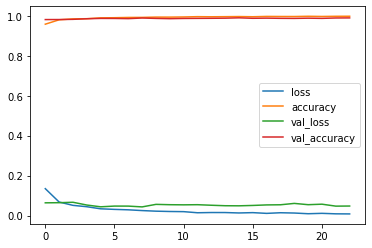

In [55]:
from functools import partial

n_epochs = 100
layer_elu_he = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

model.summary()

history = model.fit(X_train_0_to_4, y_train_0_to_4, 
                    epochs = n_epochs,
                    validation_data=(X_valid_0_to_4, y_valid_0_to_4),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)             

Epoch 36/100
25465/25465 [==============================] - 9s 336us/sample - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0348 - val_accuracy: 0.9899
Epoch 37/100
25465/25465 [==============================] - 8s 313us/sample - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoch 38/100
25465/25465 [==============================] - 8s 332us/sample - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0401 - val_accuracy: 0.9891
Epoch 39/100
25465/25465 [==============================] - 8s 319us/sample - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.0395 - val_accuracy: 0.9901
Epoch 40/100
25465/25465 [==============================] - 7s 290us/sample - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0361 - val_accuracy: 0.9897


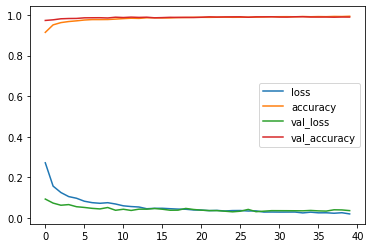

In [56]:
from functools import partial

n_epochs = 100
layer_elu_he = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    layer_elu_he(100),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

model.summary()

history = model.fit(X_train_0_to_4, y_train_0_to_4, 
                    epochs = n_epochs,
                    validation_data=(X_valid_0_to_4, y_valid_0_to_4),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

In [68]:
np.max(history.history["val_accuracy"])

0.9914247

Excercise 9

In [183]:
y_train_5=(y_train_5_to_9 == 0)
y_train_6=(y_train_5_to_9 == 1)
y_train_7=(y_train_5_to_9 == 2)
y_train_8=(y_train_5_to_9 == 3)
y_train_9=(y_train_5_to_9 == 4)

X_train_5_to_9__5 = X_train_5_to_9[y_train_5]
X_train_5_to_9__6 = X_train_5_to_9[y_train_6]
X_train_5_to_9__7 = X_train_5_to_9[y_train_7]
X_train_5_to_9__8 = X_train_5_to_9[y_train_8]
X_train_5_to_9__9 = X_train_5_to_9[y_train_9]

y_train_5_to_9__5 = y_train_5_to_9[y_train_5]
y_train_5_to_9__6 = y_train_5_to_9[y_train_6]
y_train_5_to_9__7 = y_train_5_to_9[y_train_7]
y_train_5_to_9__8 = y_train_5_to_9[y_train_8]
y_train_5_to_9__9 = y_train_5_to_9[y_train_9]

X_train_5_to_9_reduced_ordered = np.concatenate([
    X_train_5_to_9__5[:100], 
    X_train_5_to_9__6[:100], 
    X_train_5_to_9__7[:100],
    X_train_5_to_9__8[:100],
    X_train_5_to_9__9[:100]
])

y_train_5_to_9_reduced_ordered = np.concatenate([
    y_train_5_to_9__5[:100], 
    y_train_5_to_9__6[:100], 
    y_train_5_to_9__7[:100],
    y_train_5_to_9__8[:100],
    y_train_5_to_9__9[:100]
])

shuffle_idx = np.arange(len(X_train_5_to_9_reduced_ordered))
np.random.shuffle(shuffle_idx)

X_train_5_to_9_reduced = X_train_5_to_9_reduced_ordered[shuffle_idx]
y_train_5_to_9_reduced = y_train_5_to_9_reduced_ordered[shuffle_idx]

train on whole 5-9 instances

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

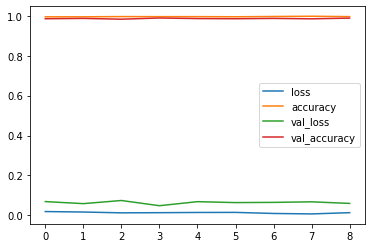

In [207]:
model_0_to_4 = keras.models.load_model("chapter11_ex8_final_state.h5")
model_0_to_4_clone = keras.models.clone_model(model_0_to_4)
model_0_to_4_clone.set_weights(model_0_to_4.get_weights())
model_5_to_9 = keras.models.Sequential(model_0_to_4_clone.layers[:-1])

for layer in model_5_to_9.layers:
    layer.trainable = False

model_5_to_9.add(keras.layers.Dense(5, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()

history = model.fit(X_train_5_to_9, y_train_5_to_9, 
                    epochs = n_epochs,
                    validation_data=(X_valid_5_to_9, y_valid_5_to_9),
                    callbacks=[early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

train on reduced 5-9 instances

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

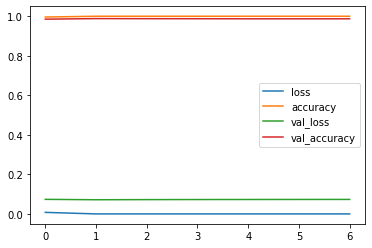

In [208]:
model_0_to_4 = keras.models.load_model("chapter11_ex8_final_state.h5")
model_0_to_4_clone = keras.models.clone_model(model_0_to_4)
model_0_to_4_clone.set_weights(model_0_to_4.get_weights())
model_5_to_9 = keras.models.Sequential(model_0_to_4_clone.layers[:-1])

for layer in model_5_to_9.layers:
    layer.trainable = False

model_5_to_9.add(keras.layers.Dense(5, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()

history = model.fit(X_train_5_to_9_reduced, y_train_5_to_9_reduced, 
                    epochs = n_epochs,
                    validation_data=(X_valid_5_to_9, y_valid_5_to_9),
                    callbacks=[early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

prediction: 5


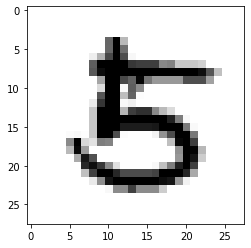

In [209]:
idx = 100
plt.imshow(X_train_5_to_9_reduced[idx], cmap="binary")
print("prediction:", y_train_5_to_9_reduced[idx] + 5)

train on reduced 5-9 instances and -1 hidden layer

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

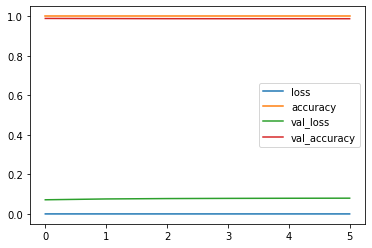

In [210]:
model_0_to_4 = keras.models.load_model("chapter11_ex8_final_state.h5")
model_0_to_4_clone = keras.models.clone_model(model_0_to_4)
model_0_to_4_clone.set_weights(model_0_to_4.get_weights())
model_5_to_9 = keras.models.Sequential(model_0_to_4_clone.layers[:-2])

for layer in model_5_to_9.layers:
    layer.trainable = False

model_5_to_9.add(keras.layers.Dense(5, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()

history = model.fit(X_train_5_to_9_reduced, y_train_5_to_9_reduced, 
                    epochs = n_epochs,
                    validation_data=(X_valid_5_to_9, y_valid_5_to_9),
                    callbacks=[early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()

plt.show()

train on reduced 5-9 instances with 2 unfrozen layers

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_77 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

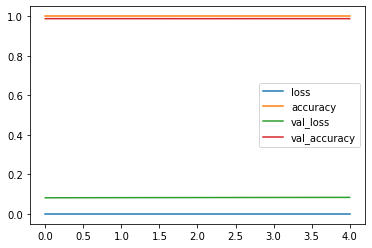

In [211]:
model_0_to_4 = keras.models.load_model("chapter11_ex8_final_state.h5")
model_0_to_4_clone = keras.models.clone_model(model_0_to_4)
model_0_to_4_clone.set_weights(model_0_to_4.get_weights())
model_5_to_9 = keras.models.Sequential(model_0_to_4_clone.layers[:-1])

for layer in model_5_to_9.layers:
    layer.trainable = False

model_5_to_9.add(keras.layers.Dense(5, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

# checkpoint_cb=keras.callbacks.ModelCheckpoint("chapter11_ex8_checkpoint.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.summary()

history = model.fit(X_train_5_to_9_reduced, y_train_5_to_9_reduced, 
                    epochs = 5,
                    validation_data=(X_valid_5_to_9, y_valid_5_to_9),
                    callbacks=[early_stopping_cb])

for layer in model_5_to_9.layers[:-2]:
    layer.trainable = True

history = model.fit(X_train_5_to_9_reduced, y_train_5_to_9_reduced, 
                epochs = 5,
                validation_data=(X_valid_5_to_9, y_valid_5_to_9),
                callbacks=[early_stopping_cb])



plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()

plt.show()

Excercise 10

In [3]:
X_train_long_pre, X_train_short_pre = X_train[:45000], X_train[45000:]
y_train_long_pre, y_train_short_pre = y_train[:45000], y_train[45000:]

def CraftTrainLong(X_train, y_train):
    X_train_1 = X_train.copy()
    X_train_2 = X_train.copy()
    y_train_1_2 = np.zeros(len(X_train))

    for idx in range(len(X_train)):
        curr_class = y_train[idx]
        curr_idxs = (y_train == curr_class)
        
        if(np.random.randint(10) <= 4):
            # --- same class
            y_train_1_2[idx] = 1
            #curr_elems = X_train[curr_idxs]
        else:
            # --- different classes
            y_train_1_2[idx] = 0
            #curr_elems = X_train[~curr_idxs]

        while True:
            idx_2 = np.random.randint(len(X_train))
            if (y_train_1_2[idx]==1 and curr_class == y_train[idx_2]) or (y_train_1_2[idx]==0 and curr_class != y_train[idx_2]):
                break
                
        #X_train_2[idx] = curr_elems[np.random.randint(len(curr_elems))]
        X_train_2[idx] = X_train[idx_2]
        if(idx % 10000 == 0):
            print (idx, end=" ")
    
    return X_train_1, X_train_2, y_train_1_2

In [4]:
X_train_long_1, X_train_long_2, y_train_long_binary = CraftTrainLong(X_train_long_pre, y_train_long_pre)
X_valid_1, X_valid_2, y_valid_binary = CraftTrainLong(X_valid, y_valid)



0 10000 20000 30000 40000 0 

same
same
diff
same
diff
diff
diff
diff
same
diff


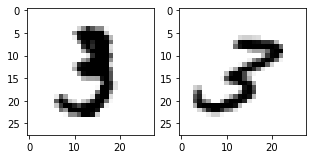

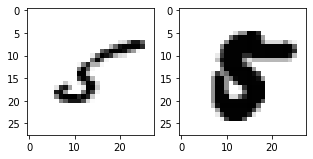

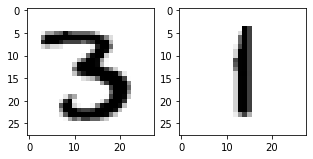

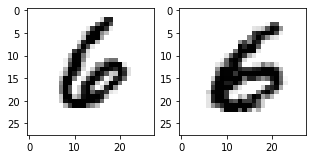

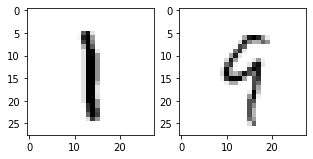

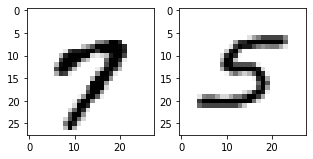

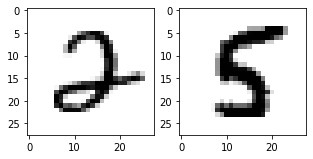

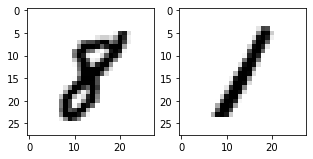

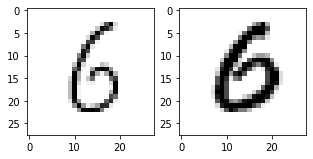

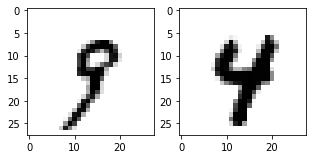

In [5]:
for idx in range(10,20):
    print("same") if y_valid_binary[idx] else print("diff")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,3))
    ax1.imshow(X_valid_1[idx], cmap="binary")
    ax2.imshow(X_valid_2[idx], cmap="binary")


diff
diff
same
same
same
same
same
same
diff
same


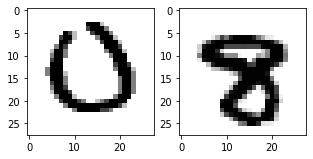

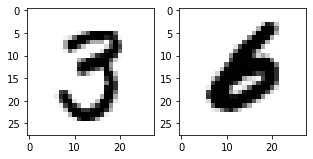

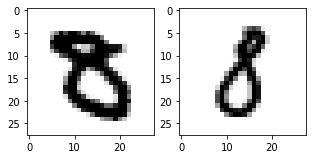

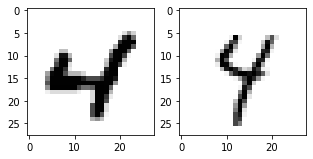

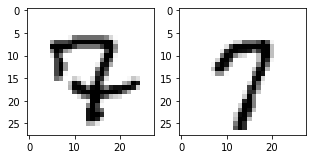

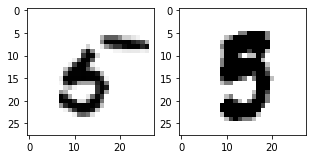

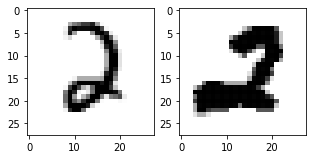

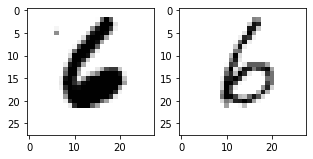

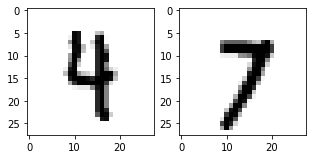

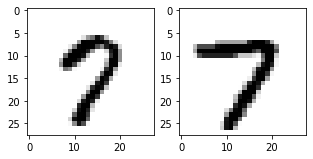

In [6]:
for idx in range(10,20):
    print("same") if y_train_long_binary[idx] else print("diff")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,3))
    ax1.imshow(X_train_long_1[idx], cmap="binary")
    ax2.imshow(X_train_long_2[idx], cmap="binary")


In [9]:
from functools import partial

keras.backend.clear_session()

input_l = keras.layers.Input(shape = X_train_long_1.shape[1:])
flatten_l = keras.layers.Flatten(input_shape = X_train_long_1.shape[1:])(input_l)
norm_l1 = keras.layers.BatchNormalization()(flatten_l)
drop_l1 = keras.layers.Dropout(rate=0.2)(norm_l1)
hidden_l1 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="freeze_1")(drop_l1)
norm_l2 = keras.layers.BatchNormalization()(hidden_l1)
drop_l2 = keras.layers.Dropout(rate=0.2)(norm_l2)
hidden_l2 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="freeze_2")(drop_l2)
norm_l3 = keras.layers.BatchNormalization()(hidden_l2)
drop_l3 = keras.layers.Dropout(rate=0.2)(norm_l3)
hidden_l3 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="freeze_3")(drop_l3)
norm_l4 = keras.layers.BatchNormalization()(hidden_l3)
drop_l4 = keras.layers.Dropout(rate=0.2)(norm_l4)
hidden_l4 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="freeze_4")(drop_l4)
norm_l5 = keras.layers.BatchNormalization()(hidden_l4)
drop_l5 = keras.layers.Dropout(rate=0.2)(norm_l5)
hidden_l5 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="freeze_5")(drop_l5)

input_r = keras.layers.Input(shape = X_train_long_2.shape[1:], name="input_r")
flatten_r = keras.layers.Flatten(input_shape = X_train_long_2.shape[1:])(input_r)
norm_r1 = keras.layers.BatchNormalization()(flatten_r)
drop_r1 = keras.layers.Dropout(rate=0.2)(norm_r1)
hidden_r1 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_r1")(drop_r1)
norm_r2 = keras.layers.BatchNormalization()(hidden_r1)
drop_r2 = keras.layers.Dropout(rate=0.2)(norm_r2)
hidden_r2 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_r2")(drop_r2)
norm_r3 = keras.layers.BatchNormalization()(hidden_r2)
drop_r3 = keras.layers.Dropout(rate=0.2)(norm_r3)
hidden_r3 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_r3")(drop_r3)
norm_r4 = keras.layers.BatchNormalization()(hidden_r3)
drop_r4 = keras.layers.Dropout(rate=0.2)(norm_r4)
hidden_r4 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_r4")(drop_r4)
norm_r5 = keras.layers.BatchNormalization()(hidden_r4)
drop_r5 = keras.layers.Dropout(rate=0.2)(norm_r5)
hidden_r5 = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", name="hidden_r5")(drop_r5)

concat_layer = keras.layers.concatenate([hidden_l5, hidden_r5], name="concat_5")

norm_c6 = keras.layers.BatchNormalization()(concat_layer)
drop_c6 = keras.layers.Dropout(rate=0.2)(norm_c6)
hidden_c6 = keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal", name="hidden_c6")(drop_c6)
norm_c7 = keras.layers.BatchNormalization()(hidden_c6)
drop_c7 = keras.layers.Dropout(rate=0.2)(norm_c7)
output_binary = keras.layers.Dense(2, activation="softmax", name="output")(drop_c7)

model = keras.Model(inputs=[input_l, input_r], outputs=[output_binary])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
    metrics=["accuracy"]
)

model.summary()

keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_r (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_r[0][0]                    
______________________________________________________________________________________________

Train on 45000 samples, validate on 10000 samples
Epoch 1/150
45000/45000 [==============================] - 13s 298us/sample - loss: 0.5606 - accuracy: 0.7139 - val_loss: 0.4134 - val_accuracy: 0.8316
Epoch 2/150
45000/45000 [==============================] - 10s 224us/sample - loss: 0.4962 - accuracy: 0.7716 - val_loss: 0.4242 - val_accuracy: 0.8294
Epoch 3/150
45000/45000 [==============================] - 10s 230us/sample - loss: 0.4806 - accuracy: 0.7806 - val_loss: 0.3799 - val_accuracy: 0.8582
Epoch 4/150
45000/45000 [==============================] - 10s 219us/sample - loss: 0.4659 - accuracy: 0.7923 - val_loss: 0.3588 - val_accuracy: 0.8557
Epoch 5/150
45000/45000 [==============================] - 12s 266us/sample - loss: 0.4512 - accuracy: 0.8002 - val_loss: 0.3487 - val_accuracy: 0.8666
Epoch 6/150
45000/45000 [==============================] - 13s 281us/sample - loss: 0.4474 - accuracy: 0.8032 - val_loss: 0.3281 - val_accuracy: 0.8732
Epoch 7/150
45000/45000 [=============

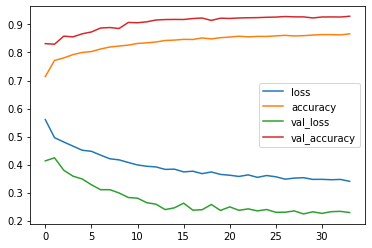

In [10]:
n_epochs = 150

history = model.fit([X_train_long_1, X_train_long_2], [y_train_long_binary],
         epochs = n_epochs,
         validation_data=([X_valid_1, X_valid_2], [y_valid_binary]),
         callbacks=[early_stopping_cb])

plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history))
plt.gca()
plt.show()

In [13]:
model.save("chapter11_ex10_binary_model.h5")

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
freeze_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0   

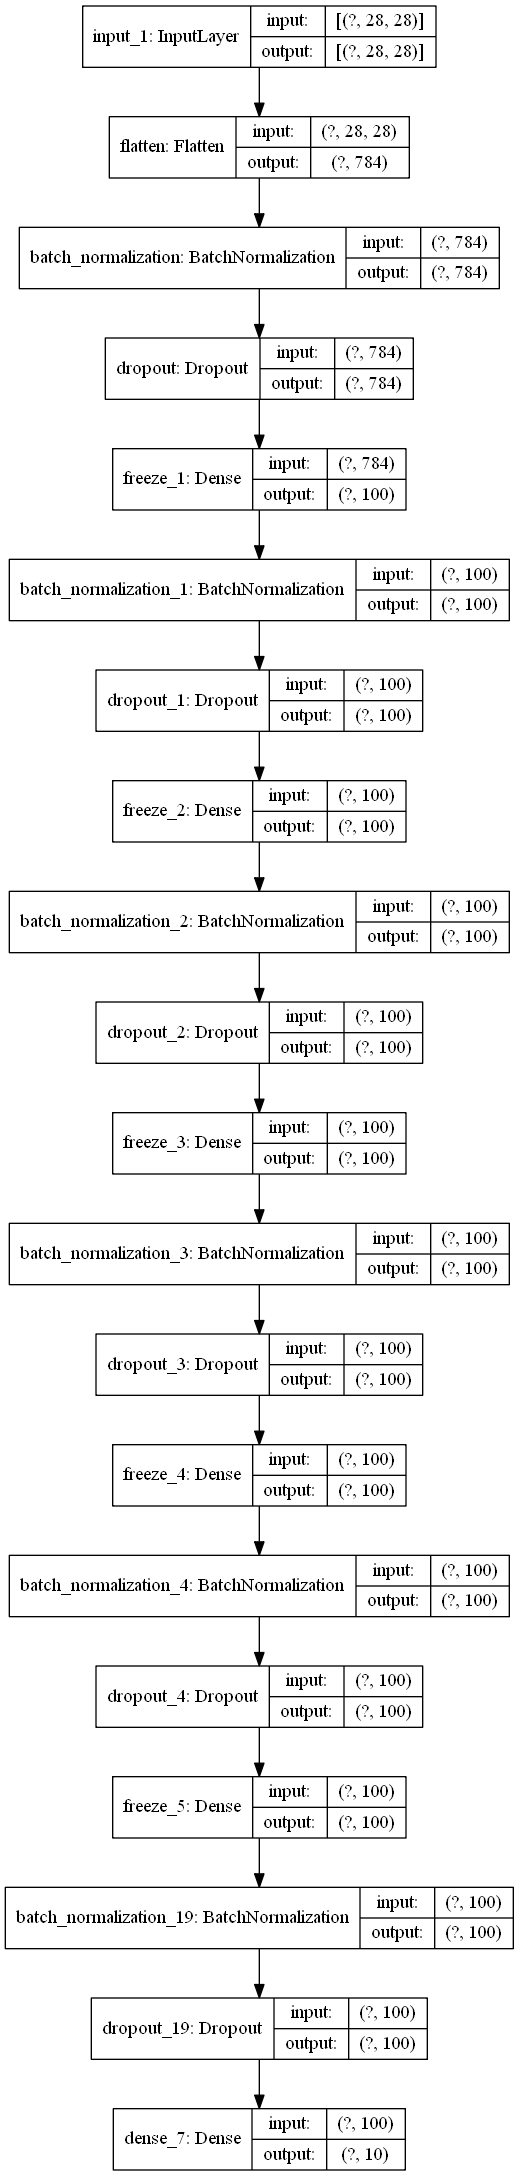

In [25]:
hidden_l1.trainable = False
hidden_l2.trainable = False
hidden_l3.trainable = False
hidden_l4.trainable = False
hidden_l5.trainable = False

norm_out = keras.layers.BatchNormalization()(hidden_l5)
drop_out = keras.layers.Dropout(rate=0.2)(norm_out)
output_ = keras.layers.Dense(10, activation="softmax")(drop_out)

model_clf = keras.Model(inputs=[input_l], outputs=[output_])

model_clf.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
    metrics = ["accuracy"]
)

model_clf.summary()

keras.utils.plot_model(model_clf, 'chapter11_ex10_clf_model.png', show_shapes=True)


In [26]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

n_epochs = 150

history_clf = model_clf.fit([X_train_short_pre], [y_train_short_pre],
         epochs = n_epochs,
         validation_data=([X_valid], [y_valid]),
         callbacks=[early_stopping_cb])

plt.plot(pd.DataFrame(history_clf.history))
plt.legend(pd.DataFrame(history_clf.history))
plt.gca()
plt.show()

Train on 5000 samples, validate on 10000 samples
Epoch 1/150
5000/5000 [==============================] - 3s 555us/sample - loss: 0.7565 - accuracy: 0.7126 - val_loss: 0.5229 - val_accuracy: 0.8015
Epoch 2/150
5000/5000 [==============================] - 1s 238us/sample - loss: 0.5666 - accuracy: 0.7932 - val_loss: 0.4013 - val_accuracy: 0.8695
Epoch 3/150
5000/5000 [==============================] - 1s 233us/sample - loss: 0.5137 - accuracy: 0.8318 - val_loss: 0.3660 - val_accuracy: 0.8972
Epoch 4/150
5000/5000 [==============================] - 1s 231us/sample - loss: 0.4096 - accuracy: 0.8714 - val_loss: 0.3092 - val_accuracy: 0.9313
Epoch 5/150
5000/5000 [==============================] - 1s 230us/sample - loss: 0.3733 - accuracy: 0.8900 - val_loss: 0.2795 - val_accuracy: 0.9307
Epoch 6/150
5000/5000 [==============================] - 1s 243us/sample - loss: 0.3339 - accuracy: 0.9042 - val_loss: 0.2847 - val_accuracy: 0.9381
Epoch 7/150
5000/5000 [==============================] - 

AttributeError: 'History' object has no attribute 'history_clf'

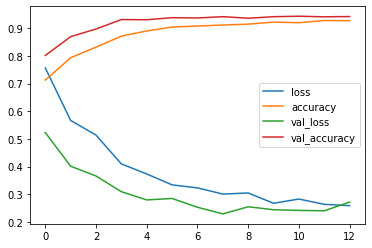

In [27]:
plt.plot(pd.DataFrame(history_clf.history))
plt.legend(pd.DataFrame(history_clf.history))
plt.gca()
plt.show()

In [28]:
model_clf.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.21879626569747926, 0.9401]

Prediction:  4	Actual:  4
Valid ?  [ True]


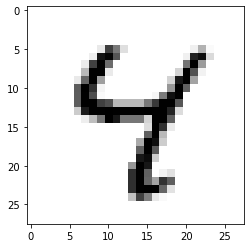

In [53]:
test_idx = 6

print("Prediction: ", np.argmax(np.round(model_clf.predict(X_test[test_idx:test_idx+1]), 2)), end="\t")
print("Actual: ", y_test[test_idx])
print("Valid ? ", np.argmax(np.round(model_clf.predict(X_test[test_idx:test_idx+1]), 2)) == y_test[test_idx:test_idx+1])
plt.imshow(X_test[test_idx], cmap="binary")